# Multiple Linear Regression
## Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## import data

In [2]:
data = pd.read_csv('50_Startups.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Preprocessing data

In [5]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

## Train and Test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## Multiple Linear Fitting

In [7]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

## Predict the test set

In [10]:
y_pred = reg.predict(X_test)

## Print out the prediction data

In [11]:
np.set_printoptions(precision=2)

In [12]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


## Visualizing the model

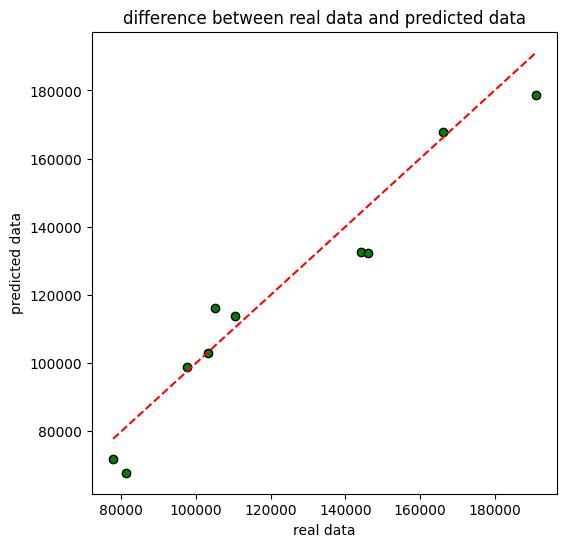

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred,color ='green',edgecolor='k')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color ='red',linestyle='--')
plt.xlabel('real data')
plt.ylabel('predicted data')
plt.title("difference between real data and predicted data")
plt.show()

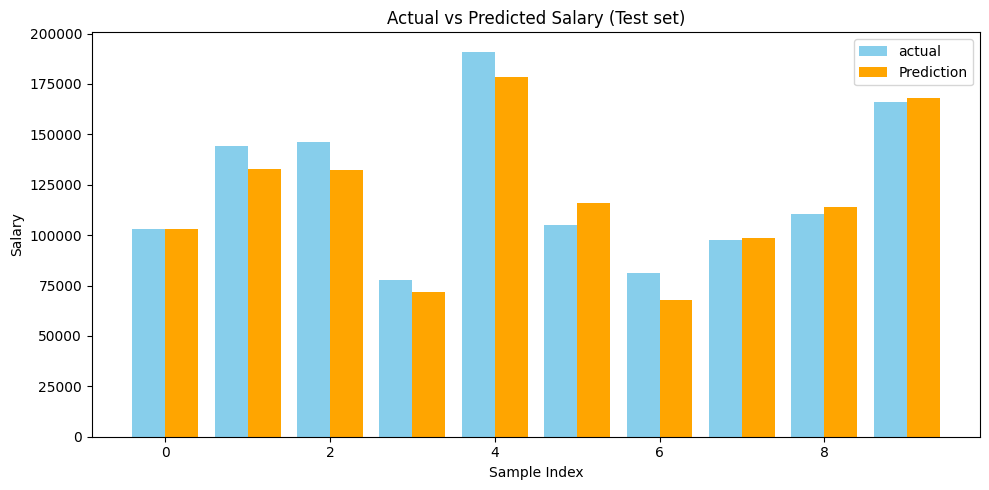

In [14]:
indices = np.arange(len(y_test))

plt.figure(figsize=(10,5))

plt.bar(indices -0.2, y_test, width=0.4, label="actual", color='skyblue')

plt.bar(indices+0.2, y_pred, width=0.4, label='Prediction', color='orange')

plt.xlabel("Sample Index")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salary (Test set)")
plt.legend()
plt.tight_layout()
plt.show()